# Section A: NLP Showcase with Supervised Learning

## Sentiment Analysis

▪ Sentiment analysis is a form of text classification wherein the text is classified either positive or negative sentiment.

In [ ]:
nltk.download()

### Loading movie_reviews dataset 

In [ ]:
from nltk.corpus import movie_reviews as reviews

# Print all file ids
reviews.fileids()

### Tips: Print file ids of all negative reviews

In [ ]:
reviews.fileids("neg")

In [ ]:
len(reviews.fileids("neg"))

### Question: How to print file ids of all positive reviews?

### Question: How many positive reviews are there?

### Categories()

In [ ]:
# Print the categories of all the files/reviews
reviews.categories()

In [ ]:
help(reviews.categories)

### Accessing positive movie_reviews

### Tips: Print all the words in both positive and negative reviews

In [ ]:
# Print all words in the 'movie_reviews' corpus
reviews.words()

In [ ]:
len(reviews.words())

### Question: How to print all the words in a positive review named "cv957_8737.txt"

### Question: How many words are contained in this positive review?

### FreqDist()

▪ The **FreqDist** function is used to find the frequency of words within a text. 

▪ It returns a **dictionary**, and hence we need to pass keys and values to get the data. 

<img src="freqdist.png" width="500">

https://www.educative.io/answers/what-is-freqdist-in-python

### Example

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

sentence = 'The FreqDist function gives the user the frequency distribution of all the words in the text'

freq_dist = FreqDist(word.lower() for word in word_tokenize(sentence))

### Question: How to access all of the keys of a dictionary?

### Question: How to access all of the values of a dictionary?

### Question: How to access all of the keys and values of a dictionary at once?

### Back to Sentiment Analysis

In [ ]:
# Prints the frequency of the word 'happy'
FreqDist(reviews.words())['happy']

In [ ]:
freq_dist = FreqDist(word.lower() for word in reviews.words())

In [ ]:
freq_dist['happy']

### most_common()

▪ most_common() is a method that returns a list of tuples of (element, count) sorted by counts.

https://note.nkmk.me/en/python-collections-counter/

In [ ]:
# Displays the frequency of the most common word in "movie_reviews"
freq_dist.most_common()[0]

In [ ]:
# Displays the frequency of the least common word in "movie_reviews"
freq_dist.most_common()[-1]

In [ ]:
# Displays the frequencies of all words in "movie_reviews" in descending order
freq_dist.most_common()

In [ ]:
# Displays the frequencies of all words in "movie_reviews" in ascending order
freq_dist.most_common()[::-1]

In [ ]:
# Displays the frequency of 15 most common words in "movie_reviews" in descending order
freq_dist.most_common(15)

In [ ]:
# Displays the frequency of 15 most common words in "movie_reviews" in ascending order
freq_dist.most_common(15)[::-1]

### Nested List Comprehension

<img src="nested.png" width="500">

▪ Outermost loop comes first, followed by innermost loop.

https://www.youtube.com/watch?v=AzKV9NbtNJ0

### Examples

In [ ]:
text_1 = ["Python", "Nested"]
text_2 = ["List", "Comprehension"]

output = [(word_1, word_2) for word_1 in text_1 for word_2 in text_2]

print(output)

In [ ]:
text = [["Python", "Nested"], ["List", "Comprehension"]]

output = [word for words in text for word in words]

print(output)

In [ ]:
list_1 = [(x, y) for x in range(0, 3) for y in range(0, 3)]

print(list_1)

### Back to Sentiment Analysis

In [ ]:
docs = [(list(reviews.words(id)), cat) for cat in reviews.categories() for id in reviews.fileids(cat)]

In [ ]:
# There are 2000 binary tuples in total
len(docs)

In [ ]:
print(docs[0])

In [ ]:
tempo = [(len(d[0]), d[0][:2], d[1]) for d in docs[:10]]
tempo

In [ ]:
import random

random.shuffle(docs)

In [ ]:
tempo = [(len(d[0]), d[0][:2], d[1]) for d in docs[:10]]
tempo

In [ ]:
# Print the list of top 2000 most frequent words
top_keys = [key for (key, value) in freq_dist.most_common(2000)]
print(top_keys[:100])

In [ ]:
import nltk

def review_features(doc):
    # Convert a list of words to a set
    doc_set = set(doc)
    
    # Create an empty dictionary
    features = {}
    
    # Loop through the 2000 words
    for word in top_keys:
        # (word in doc_set) checks the presence of a word in doc_set and return either true or false
        # feature is a dictionary that stores a key-value pair in the format of (word, true/false)
        features[word] = (word in doc_set)
        
    return features

data = [(review_features(doc), label) for (doc, label) in docs]

### Checking the 1st review

In [ ]:
print(data[0][0])

In [ ]:
print(data[0][0]['movie'])

In [ ]:
print(data[0][1])

### Checking the last review

In [ ]:
print(data[-1][0])

In [ ]:
print(data[-1][0]['movie'])

In [ ]:
print(data[-1][1])

### Splitting Dataset into Training Data and Test Data

In [ ]:
data_count = len(data)
train_count = int(.8 * data_count)
train_count

In [ ]:
train_data = data[:train_count]
test_data = data[train_count:]

### Training and Evaluating the Predictive Model

In [ ]:
bayes = nltk.NaiveBayesClassifier.train(train_data)

In [ ]:
print("Train accuracy:", nltk.classify.accuracy(bayes, train_data))
print("Test accuracy:", nltk.classify.accuracy(bayes, test_data))

In [ ]:
bayes.show_most_informative_features(25)

# Section B: Unsupervised Machine Learning

## Types of Machine Learning

▪ Machine learning can be divided into two types: 

![](sml_usml.png)

<img src="super.png" width="500">

https://blog.bismart.com/en/classification-vs.-clustering-a-practical-explanation

### Unsupervised Machine Learning

▪ Unsupervised algorithms make inferences from datasets using only **input vectors without referring to known, or labelled, outcomes**.

▪ The algorithm must figure out what it is viewing by itself and the objective is to discover interesting patterns in the data. 

▪ For instance, are there any subgroups or **"clusters"** among the data instances?

<img src="unsuper.png" width="500">

### Clustering

▪ Clustering can be considered the most important unsupervised learning problem.

▪ A **centroid** is the imaginary or real location representing the center of the cluster.

<img src="centroid.png" width="600">

### Example

The following 3 general clusters of consumers can let us understand our customers better:

▪ Older customers spent very little

▪ Middle-aged/older customers spent a lot

▪ Middle-aged/younger customers spent a medium amount

<img src="clustering.png" width="350">

https://blog.dataiku.com/clustering-how-it-works-in-plain-english

## The Iris Dataset 

### Understanding the dataset

▪ **Iris Dataset**: The data set contains 3 classes with 50 instances each, and 150 instances in total, where each class refers to a type of iris plant.

▪ **Class**: Iris Setosa, Iris Versicolour, Iris Virginica

▪ **Data Format**: (sepal length, sepal width, petal length, petal width)

https://www.analyticsvidhya.com/blog/2021/06/analyzing-decision-tree-and-k-means-clustering-using-iris-dataset/

<img src="iris_flowers.png" width="700">

<img src="iris.png" width="600">

## Section C: Clustering with K-Means

### Avoid memory leak when dealing with KMeans

▪ A memory leak is the incorrect management of memory allocations by a computer program where the unneeded memory isn't released. 

In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "1"

### Step 1: Loading the Dataset into a DataFrame

In [2]:
import pandas as pd

# Import some data to play with
iris = pd.read_csv('iris_data2.csv')

In [3]:
iris.shape

(150, 5)

In [4]:
# Show the first 5 records
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Show the last 5 records
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-verginica
146,6.3,2.5,5.0,1.9,Iris-verginica
147,6.5,3.0,5.2,2.0,Iris-verginica
148,6.2,3.4,5.4,2.3,Iris-verginica
149,5.9,3.0,5.1,1.8,Iris-verginica


In [6]:
iris.groupby('species').size() 

species
Iris-setosa        50
Iris-verginica     50
Iris-versicolor    50
dtype: int64

### Step 2: Data visualization with mathplotlib

▪ The plot() function is used to draw points (markers) in a diagram. 

▪ By default, the plot() function draws a line from point to point.

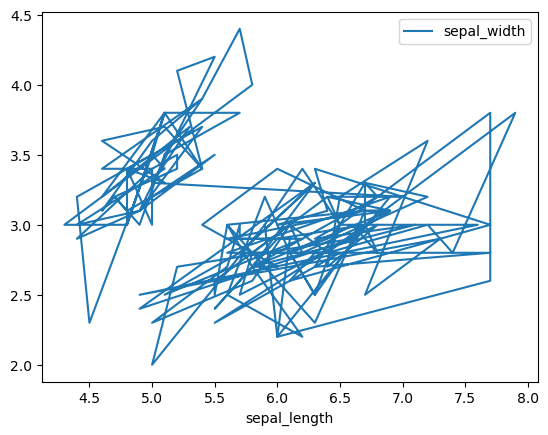

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

iris.plot(x = "sepal_length", y = "sepal_width")
plt.show()

### Scatter Plot

▪ Scatter plot is a graph in which the values of two variables are plotted along two axes.

▪ It is the most basic type of plot that helps you visualize the relationship between two variables.

Text(0.5, 1.0, 'Scatter plot on Iris dataset')

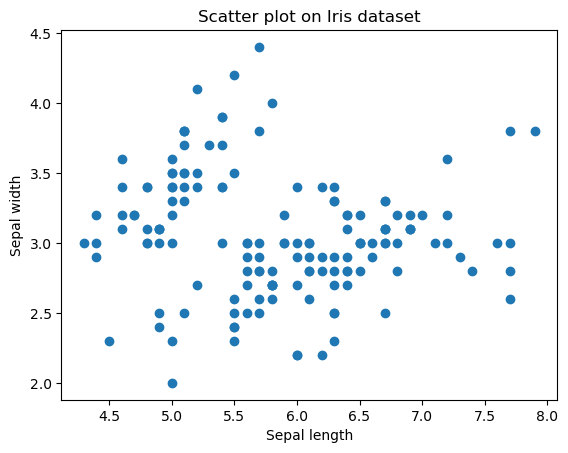

In [8]:
plt.scatter(iris['sepal_length'], iris['sepal_width'])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Scatter plot on Iris dataset')

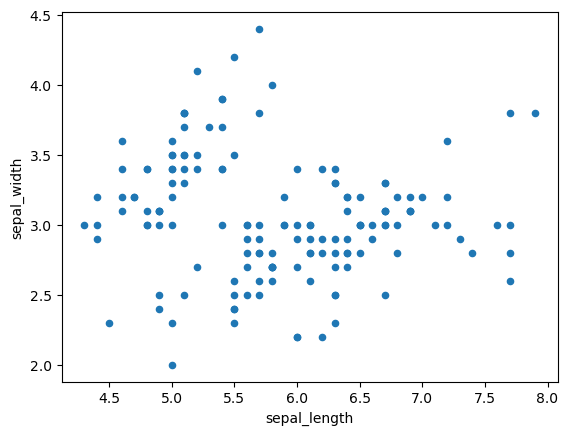

In [9]:
iris.plot(kind = "scatter", x = "sepal_length", y = "sepal_width")
plt.show()

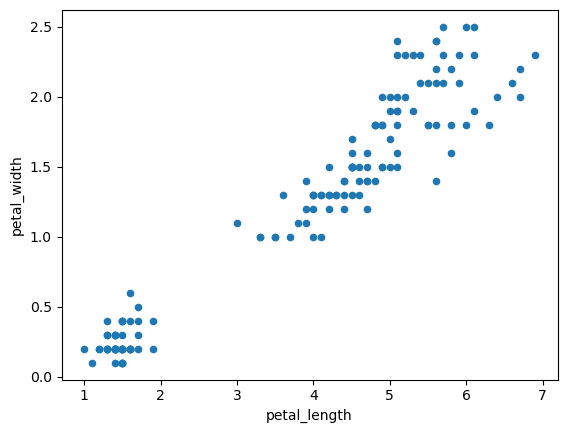

In [10]:
iris.plot(kind = "scatter", x = "petal_length", y = "petal_width")
plt.show()

### Andrews curves 

▪ We can use andrews_curves() to visualize high-dimensional or multivariate data by plotting the Andrews curves.

▪ Each frame row represents a single curve.

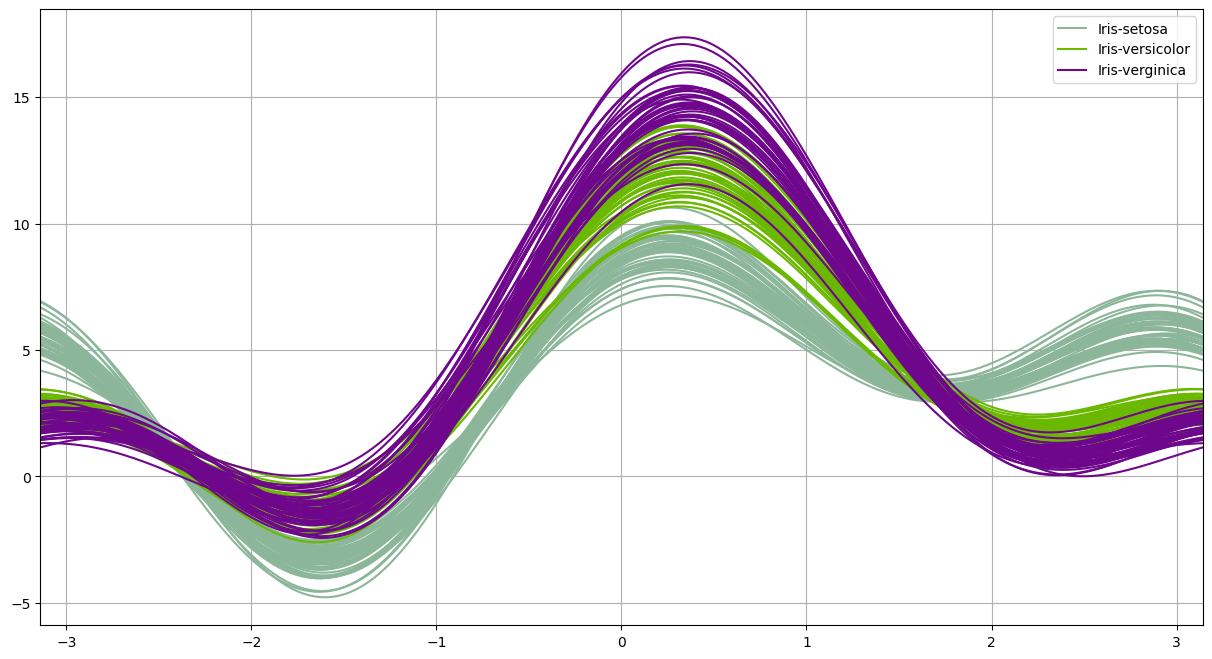

In [11]:
from pandas.plotting import andrews_curves

plt.figure(figsize = (15, 8)) 
andrews_curves(iris, "species")
plt.show()

### Step 3: Splitting Data into Feature and Label

In [12]:
#remove the species label

# Inputs into model
X = iris.iloc[:, 0:4] 

# The label can be used to evaluate the model
y = iris.species

In [13]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [15]:
print(len(X))
print(len(y))

150
150


### Clustering with K-means

▪ K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

▪ K-Means will be used to find groups in the flower data.

▪ The term "K" is a number that indicates how many clusters we need to create. E.g., K = 2 refers to two clusters.

<img src="centroid.png" width="600">

▪ The term "means" refers to averaging of the data; that is, finding the centroid.

https://www.simplilearn.com/tutorials/machine-learning-tutorial/k-means-clustering-algorithm

### Building the K-means model: Instructions

▪ Step 1: Import KMeans from **sklearn.cluster**.

▪ Step 2: Use KMeans() to create a KMeans instance called **km** to find the 3 clusters. 

▪ Step 3: To specify the number of clusters, use the **n_clusters** keyword argument.

▪ Step 4: Use the **.fit()** method of model to fit the model to the array of points points.

▪ Step 5: Use the **.predict()** method of model to predict the cluster labels of new_points, assigning the result to labels.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

### Step 4: Fitting the Model with Data

In [16]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters
km = KMeans(n_clusters = 3)

### Step 5: Accessing the Clusters of Data via labels_

In [62]:
# Fit the model to the input training instances
km.fit(X)

labels = km.labels_

# Print cluster labels of new_points
print(labels)

#0, 1, 2 = 3 different clusters

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [63]:
# Use fit_predict to fit model and obtain cluster labels: labels
km_labels = km.fit_predict(X)

print(km_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### cluster_centers_

▪ We use the **cluster_centers_** attribute to see the cluster centers (also called centroids). 

In [19]:
# Identify the center points of the data
centers = km.cluster_centers_
print(centers)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


### Scatter plot

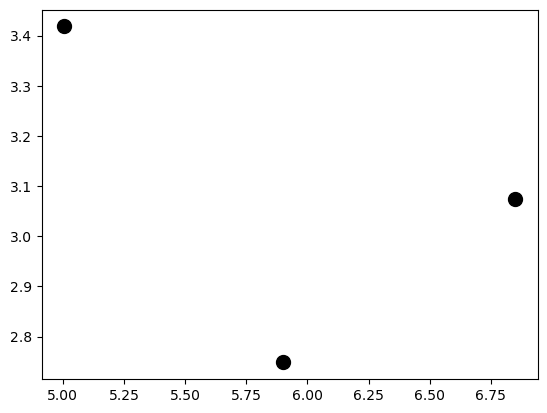

In [20]:
import matplotlib.pyplot as plt

# s = 100 represents the marker size 
# c = 'black' represents the marker colors
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 100, c = 'black')

#first two value (sepal length & width)

In [21]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'km_labels': km_labels, 'species': y})
df

,km_labels,species
0,1,Iris-setosa
1,1,Iris-setosa
2,1,Iris-setosa
3,1,Iris-setosa
4,1,Iris-setosa
...,...,...
145,0,Iris-verginica
146,2,Iris-verginica
147,0,Iris-verginica
148,0,Iris-verginica


### Correspondence with iris species

### crosstab()

▪ Use the **pd.crosstab()** function on df['labels'] and df['varieties'] to count the number of times each iris species coincides with each cluster label. 

In [22]:
# Create crosstab: ct
ct = pd.crosstab(df['km_labels'], y)
#ct = pd.crosstab(df['km_labels'], df['species'])
ct

species,Iris-setosa,Iris-verginica,Iris-versicolor
km_labels,,,
0,0,36,2
1,50,0,0
2,0,14,48


In [23]:
# Create crosstab: ct
ct = pd.crosstab(df['km_labels'], df['species'], margins = True)
ct

species,Iris-setosa,Iris-verginica,Iris-versicolor,All
km_labels,,,,
0,0,36,2,38
1,50,0,0,50
2,0,14,48,62
All,50,50,50,150


### Different Types of Validation Techniques

▪ Two techniques are used to validate the results for cluster learning:

\>>> **External validation**: This type of result validation can be carried out if true **cluster labels** are available.

\>>> **Internal validation**: Most of the methods of internal validation combine cohesion and separation to estimate the validation score. (no cluster labels)

**[More Info: Clustering Metrics](https://scikit-learn.org/stable/modules/classes.html)**

### External Validation: V-measure

▪ **homogeneity**: each cluster contains only members of a single class.

▪ **completeness**: all members of a given class are assigned to the same cluster.

▪ V-measure score can be interpretated as an average of other two measures: homogeneity and completeness.

https://www.kaggle.com/code/sashr07/unsupervised-learning-tutorial/notebook

### Example

In [24]:
from sklearn import metrics

labels_true = [0, 0, 0, 1, 1, 1] #labels

labels_pred_1 = [0, 0, 1, 1, 2, 2] #clusters
labels_pred_2 = [0, 0, 0, 1, 2, 2] #clusters

In [25]:
homogeneity = metrics.homogeneity_score(labels_true, labels_pred_1)  
print(homogeneity)

completeness = metrics.completeness_score(labels_true, labels_pred_1) 
print(completeness)

from sklearn.metrics.cluster import v_measure_score
v_measure = v_measure_score(labels_true, labels_pred_1)  
print(v_measure)

0.6666666666666669
0.420619835714305
0.5158037429793889


In [26]:
# Output order: Homogeneity, completeness and V-measure
print('labels_pred_1:', metrics.homogeneity_completeness_v_measure(labels_true, labels_pred_1))

labels_pred_1: (0.6666666666666669, 0.420619835714305, 0.5158037429793889)


In [27]:
# The following clustering is perfectly homogeneous but not complete
print('labels_pred_2:', metrics.homogeneity_completeness_v_measure(labels_true, labels_pred_2))

labels_pred_2: (1.0, 0.6853314789615865, 0.8132898335036762)


### Back to Iris-Dataset Clustering

### Question: How to measure homogeneity of clustering?

In [28]:
homogeneity = metrics.homogeneity_score(y, km_labels)  
print(homogeneity)

0.7514854021988338


### Question: How to measure completeness of clustering?

In [29]:
completeness = metrics.completeness_score(y, km_labels) 
print(completeness)

0.7649861514489815


### Question: How to measure v-measure score of clustering?

In [30]:
v_measure = v_measure_score(y, km_labels)  
print(v_measure)

0.7581756800057784


### Question: How to measure all of the 3 scores of clustering at once?

In [31]:
homo_complete_v = metrics.homogeneity_completeness_v_measure(y, km_labels)

print('labels_pred_2:', homo_complete_v)

labels_pred_2: (0.7514854021988338, 0.7649861514489815, 0.7581756800057784)


### Measuring The Quality of Clustering

▪ A good clustering has tight clusters where all samples in each cluster bunched together.

### Inertia

▪ Afer fitting a model with fit(), an attribute called **inertia_** is available.

▪ Inertia calculates the sum of distances of all the points within a cluster from the centroid of that cluster.

▪ The smaller the Inertia value, the more coherent are the different clusters. 

https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

In [32]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3)
km.fit(X)

print(km.inertia_)

78.94084142614601


### How to find the optimal K?

▪ A good model is one with low inertia AND a low number of clusters (K). 

▪ However, this is a tradeoff because as K increases, inertia decreases.

▪ To find the optimal K for a dataset, use the **Elbow method** to find the point where the decrease in inertia begins to slow. 

<img src="elbow.png" width="500">

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

### Instructions

▪ For each of the given values of k, perform the following steps:

\>>> Create a KMeans instance called model with k clusters.

\>>> Fit the model to the grain data samples.

\>>> Append the value of the inertia_ attribute of model to the list inertias.

https://www.kaggle.com/sashr07/unsupervised-learning-tutorial

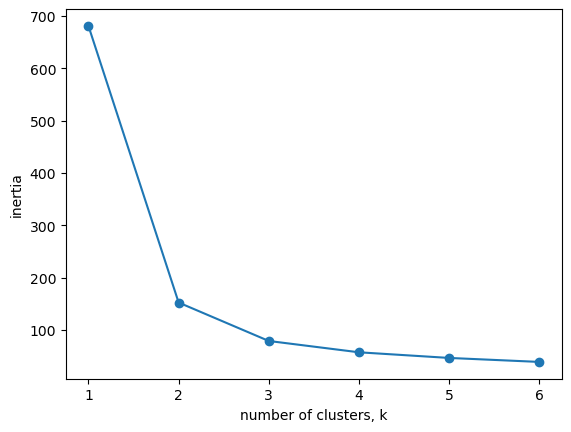

In [33]:
ks = range(1, 7)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# Section C: Exercise

## 1.0 Mean Shift

### Import the library

### Find out the number of estimated clusters by Mean Shift

### Fit Mean Shift model and generate the ct

### Calculate the score using v_measure_score()

__Example output:__ 0.6994

## 2.0 Gaussian mixture models (GMM)

### Import library

### Fit GMM model

### Generate the ct

### Calculate the score using *v_measure_score()*

__Example output:__ 0.8997

## 3.0 Agglomerative Hierarchical  Clustering

### Import library

### Fit the model

### Generate the ct

__Example output:__ 0.7701